# **Museum of Modern Art data analysis**

### **Queries-**

1. How modern are the artworks at the Museum?

2. Which artists are featured the most?

3. Are there any trends in the dates of acquisition?

4. What types of artwork are most common?

In [ ]:
#importing the necessary libraries and files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
artist = pd.read_csv('Artists.csv')
artworks = pd.read_csv('Artworks.csv')
dic = pd.read_csv('MoMA_data_dictionary.csv')

In [4]:
dic

,Table,Field,Description
0,Artworks,Title,The name or title of the artwork.
1,Artworks,Artist,The name of the artist(s) who created the artw...
2,Artworks,ConstituentID,Unique identifier(s) for the artist(s) related...
3,Artworks,ArtistBio,A short biography or background information ab...
4,Artworks,Nationality,The country or region of origin of the artist.
5,Artworks,BeginDate,The year the artist was born.
6,Artworks,EndDate,The year the artist passed away.
7,Artworks,Gender,The gender of the artist.
8,Artworks,Date,The date or year the artwork was created.
9,Artworks,Medium,"The material(s) used to create the artwork, su..."


In [5]:
artist.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN


In [6]:
artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


### **1. How modern are the artworks at the Museum?**

In [ ]:
#Storing the conditioned dates into another column
artworks['is_modern'] = artworks['Date'] >= '2000'

#finding the values of the necessary parameters to find the percentage
modern_works = artworks['is_modern'].sum()
total_works = len(artworks)

In [8]:
print(f'Artworks in the museum are {(modern_works/total_works)*100:.2f}% modern')

Artworks in the museum are 19.58% modern


### **2. Which artists are featured the most?**

In [ ]:
# Groupin the artist by their names
# Sorting the values in descending order by using .sort_values(ascending = False)
# Printing the 1st value of the series that is present in index 0 by using .index[0]
most_featured = artworks.groupby('Artist')['Artist'].value_counts().sort_values(ascending = False).index[0]

In [10]:
print(f'Most featured artist is {most_featured}')

Most featured artist is Ludwig Mies van der Rohe


### **3. Are there any trends in the dates of acquisition?**

In [ ]:
# Converting the DateAcquired column to datetime format then the year part of the date to integer and discarding the rest
artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired'], errors='coerce')
artworks['DateAcquired'] = artworks['DateAcquired'].dt.year.fillna(0).astype(int)

# Converting the Date column to numeric value, filling the N/A cells with 0 then converting it to type integer
artworks['Date'] = pd.to_numeric(artworks['Date'], errors='coerce').fillna(0).astype(int)

# Conveting the values of the columns into string (which is in the format '(Year)')
# Extracting the Year value from between the brackets using str.extract(r'(\d+)')[0]
# Filling the N/A cells with the value 0
# Converting the values to integer from string
artworks['BeginDate'] = pd.to_numeric(artworks['BeginDate'].astype(str).str.extract(r'(\d+)')[0], errors='coerce').fillna(0).astype(int)
artworks['EndDate'] = pd.to_numeric(artworks['EndDate'].astype(str).str.extract(r'(\d+)')[0], errors='coerce').fillna(0).astype(int)

In [27]:
# Storing the numeric columns into a variable using select_dtypes(include = ['number'])
numeric_val = artworks.select_dtypes(include = ['number'])
# Finding the correlation between the numeric values
corr_matrix = numeric_val.corr()

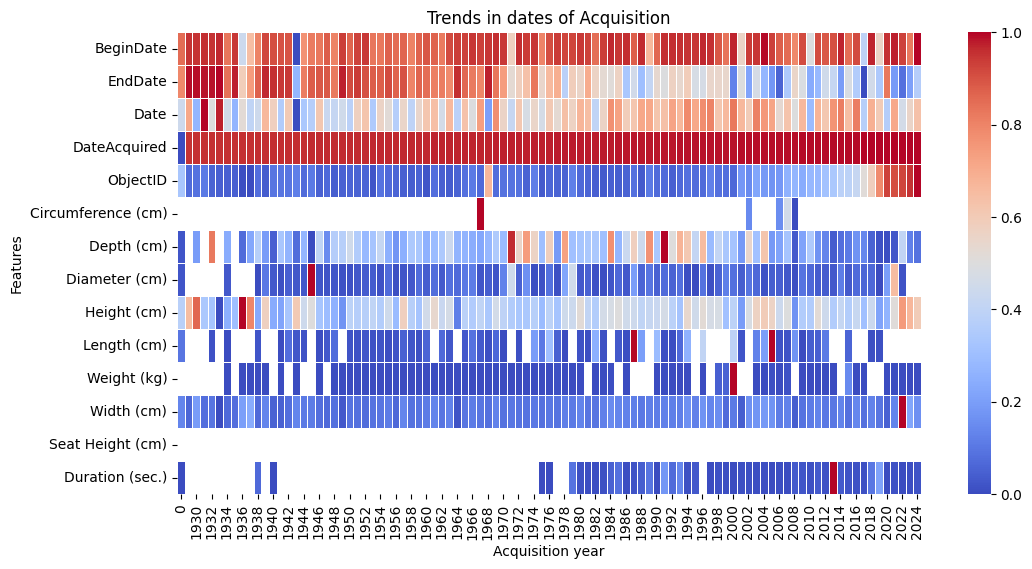

In [ ]:
# Group by DateAcquired & Aggregate and listing their mean values
heatmap_data = numeric_val.groupby(artworks['DateAcquired']).mean()

# Normalize for better visualization
heatmap_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

#plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap="coolwarm", linewidths=0.5)

#Lables
plt.title("Trends in dates of Acquisition")
plt.xlabel("Acquisition year")
plt.ylabel("Features")

plt.show()

### **4. What types of artwork are most common?**

In [ ]:
# Grouping artworks by their classification - artworks.groupby('Classification')['Classification']
# placing the count of each classification accross it - count()
# sorting the values in descending order to find the most common categories - sort_values(ascending = False)
# converting the 1st few items to a list - index.to_list()[:5]
common = artworks.groupby('Classification')['Classification'].count().sort_values(ascending = False).index.to_list()[:5]

# converting the list to string and seperating it by commas
common_str = ', '.join(common)

In [35]:
print(f'Most common types of artworks by order are {common_str}.....')

Most common types of artworks by order are Photograph, Print, Illustrated Book, Mies van der Rohe Archive, Drawing.....
